## Importing Pre-requisite Packages and Dataset

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

In [89]:
data = pd.read_csv("Global_Superstore2.csv")

## Data Understanding

In [90]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [91]:
data.shape

(51290, 24)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [93]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [94]:
data.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [95]:
data.select_dtypes(include=np.number).head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,10024.0,2309.650,7,0.0,762.1845,933.57
1,26341,NaN,3709.395,9,0.1,-288.7650,923.63
2,25330,NaN,5175.171,9,0.1,919.9710,915.49
3,13524,NaN,2892.510,5,0.1,-96.5400,910.16
4,47221,NaN,2832.960,8,0.0,311.5200,903.04


In [96]:
data.select_dtypes(include=np.object).head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical


#### Observations -

- The data has approx 51000 records and 24 variables.
- Within the variables, 7 have been identified as numerical variables.
- Remaining 17 have been identified as categorical
- Postal code is the only columns consisting of missing values.
- Out of the 7, row number and postal code should be identified as categorical as they cannot be used for any aggregations or arithematic operations.
- Also, order date and ship date have been identified as categorical fields whereas they should be datetime fields.

## Data Cleaning and Preparation

In [97]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [98]:
## Removing unwanted spaces and dashes in column names for easier indexing
data.columns = [i.replace(" ","") for i in data.columns]
data.columns = [i.replace("-","") for i in data.columns]

In [99]:
data.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'City', 'State', 'Country', 'PostalCode',
       'Market', 'Region', 'ProductID', 'Category', 'SubCategory',
       'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit',
       'ShippingCost', 'OrderPriority'],
      dtype='object')

In [100]:
## Converting row id to categorical / object datatype
data.RowID = data.RowID.astype("object")

In [101]:
## Converting postal code to categorical / object datatype
data.PostalCode = data.PostalCode.astype("object")

In [102]:
## Ship date and order date converted to datetime
data.ShipDate = pd.to_datetime(data.ShipDate)
data.OrderDate = pd.to_datetime(data.OrderDate)

In [103]:
data.select_dtypes(include=np.number).head()

,Sales,Quantity,Discount,Profit,ShippingCost
0,2309.650,7,0.0,762.1845,933.57
1,3709.395,9,0.1,-288.7650,923.63
2,5175.171,9,0.1,919.9710,915.49
3,2892.510,5,0.1,-96.5400,910.16
4,2832.960,8,0.0,311.5200,903.04


In [104]:
data.select_dtypes(include=np.object).head()

,RowID,OrderID,ShipMode,CustomerID,CustomerName,Segment,City,State,Country,PostalCode,Market,Region,ProductID,Category,SubCategory,ProductName,OrderPriority
0,32298,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,26341,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,25330,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,13524,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,47221,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical


In [105]:
## Dropping row id as it is not of any use.
data.drop("RowID",axis=1,inplace=True)

In [106]:
## Checking for lead spaces
for col in data.select_dtypes(include=np.object).drop("PostalCode",axis=1):
    for i in data[col]:
        if i.strip() != i:
            print(col)
            break

ProductName


In [107]:
data.ProductName = data.ProductName.apply(lambda x:x.strip())

In [108]:
## Getting rid of unneccessary characters causing problems in encoding when needed to export to mysql.
data.ProductName = data.ProductName.apply(lambda x:"".join(re.findall(r"[A-Za-z0-9- ]+",x)))

In [109]:
## Getting rid of unneccessary characters causing problems in encoding when needed to export to mysql.
data.CustomerName = data.CustomerName.apply(lambda x:"".join(re.findall(r"[A-Za-z0-9- ]+",x)))

In [110]:
## Getting rid of Postal code as Place information given
data.drop("PostalCode",axis=1,inplace=True)

In [111]:
## Getting rid of state and city as we will be using region and country for geographical charts or analysis
data.drop(["State","City"],axis=1,inplace=True)

In [112]:
## Finding time elapsed between date of order and date when order is finally shipped to customer.
data["DaysTillShipment"] = data.ShipDate - data.OrderDate
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,Market,Region,...,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,United States,US,East,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0 days
1,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Justin Ritter,Corporate,Australia,APAC,Oceania,...,Furniture,Chairs,Novimex Executive Leather Armchair Black,3709.395,9,0.1,-288.7650,923.63,Critical,61 days
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Australia,APAC,Oceania,...,Technology,Phones,Nokia Smart Phone with Caller ID,5175.171,9,0.1,919.9710,915.49,Medium,1 days
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Germany,EU,Central,...,Technology,Phones,Motorola Smart Phone Cordless,2892.510,5,0.1,-96.5400,910.16,Medium,2 days
4,SG-2013-4320,2013-05-11,2013-06-11,Same Day,RH-9495,Rick Hansen,Consumer,Senegal,Africa,Africa,...,Technology,Copiers,Sharp Wireless Fax High-Speed,2832.960,8,0.0,311.5200,903.04,Critical,31 days


In [113]:
data.DaysTillShipment = data.DaysTillShipment.apply(lambda x:x.days)
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,Market,Region,...,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,United States,US,East,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0
1,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Justin Ritter,Corporate,Australia,APAC,Oceania,...,Furniture,Chairs,Novimex Executive Leather Armchair Black,3709.395,9,0.1,-288.7650,923.63,Critical,61
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Australia,APAC,Oceania,...,Technology,Phones,Nokia Smart Phone with Caller ID,5175.171,9,0.1,919.9710,915.49,Medium,1
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Germany,EU,Central,...,Technology,Phones,Motorola Smart Phone Cordless,2892.510,5,0.1,-96.5400,910.16,Medium,2
4,SG-2013-4320,2013-05-11,2013-06-11,Same Day,RH-9495,Rick Hansen,Consumer,Senegal,Africa,Africa,...,Technology,Copiers,Sharp Wireless Fax High-Speed,2832.960,8,0.0,311.5200,903.04,Critical,31


In [114]:
## Creating a new feature to find out whether order was placed on a weekday or weekend.
data["OrderDay"] = data.OrderDate.apply(lambda x:"Weekend Order" if x.weekday() >= 5 else "Weekday Order")
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,Market,Region,...,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,United States,US,East,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0,Weekday Order
1,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Justin Ritter,Corporate,Australia,APAC,Oceania,...,Chairs,Novimex Executive Leather Armchair Black,3709.395,9,0.1,-288.7650,923.63,Critical,61,Weekday Order
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Australia,APAC,Oceania,...,Phones,Nokia Smart Phone with Caller ID,5175.171,9,0.1,919.9710,915.49,Medium,1,Weekday Order
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Germany,EU,Central,...,Phones,Motorola Smart Phone Cordless,2892.510,5,0.1,-96.5400,910.16,Medium,2,Weekday Order
4,SG-2013-4320,2013-05-11,2013-06-11,Same Day,RH-9495,Rick Hansen,Consumer,Senegal,Africa,Africa,...,Copiers,Sharp Wireless Fax High-Speed,2832.960,8,0.0,311.5200,903.04,Critical,31,Weekend Order


In [115]:
data.Region.unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

In [116]:
data.Market.unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

#### Observation - 
- Within the region variable, we have more than 10 unique levels, which could make it slightly difficult for analysis and visualization. 
- Also there could be several overlapping between central and EMEA regions.
- Within market, we have categories, which could be overlapping logically (ex - EU & EMEA) and many don't make sense (ex - different categories for US and Canada though there are a part of north america).
- Since we wish to focus on region, we will create new categories for regions and replace existing ones.
- We will use the regions assigned to countries in the world indicators dataset.
- We will also use the dataset to replace the country name in the global superstores dataset with the names in the world indicators dataset as the word indicators dataset country name are known to be accepted in tableau geograhical mappings.
- We will drop market as we don't intend to use it and it is similar to regions.

In [117]:
data.drop("Market",axis=1,inplace=True)

## Creating New Region codes using World Indicators Dataset

In [118]:
wd = pd.read_csv("WDICountry.csv")

In [119]:
wd = wd[['Country Code', 'Short Name','Long Name','Region']]

In [120]:
wd.head()

,Country Code,Short Name,Long Name,Region
0,ABW,Aruba,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,Islamic State of Afghanistan,South Asia
2,AGO,Angola,People's Republic of Angola,Sub-Saharan Africa
3,ALB,Albania,Republic of Albania,Europe & Central Asia
4,AND,Andorra,Principality of Andorra,Europe & Central Asia


In [121]:
wd["Short Name"].sort_values().tail(30)

243                    Tanzania
230                    Thailand
21                  The Bahamas
84                   The Gambia
234                 Timor-Leste
229                        Togo
236                       Tonga
239         Trinidad and Tobago
240                     Tunisia
241                      Turkey
232                Turkmenistan
225    Turks and Caicos Islands
242                      Tuvalu
244                      Uganda
245                     Ukraine
6          United Arab Emirates
79               United Kingdom
248               United States
246         Upper middle income
247                     Uruguay
249                  Uzbekistan
255                     Vanuatu
251                   Venezuela
254                     Vietnam
253              Virgin Islands
193          West Bank and Gaza
256                       World
259                       Yemen
261                      Zambia
262                    Zimbabwe
Name: Short Name, dtype: object

In [122]:
data_countries = pd.DataFrame({"Country":data["Country"].unique()})

In [123]:
data_countries = data_countries.merge(wd,how="left",left_on="Country",right_on="Short Name")

In [124]:
data_countries[data_countries.isnull().any(axis=1)]

,Country,Country Code,Short Name,Long Name,Region
16,Taiwan,NaN,NaN,NaN,NaN
19,Democratic Republic of the Congo,NaN,NaN,NaN,NaN
73,Myanmar (Burma),NaN,NaN,NaN,NaN
76,Republic of the Congo,NaN,NaN,NaN,NaN
79,South Korea,NaN,NaN,NaN,NaN
82,Cote d'Ivoire,NaN,NaN,NaN,NaN
90,Martinique,NaN,NaN,NaN,NaN
91,Syria,NaN,NaN,NaN,NaN
121,Hong Kong,NaN,NaN,NaN,NaN
123,Guadeloupe,NaN,NaN,NaN,NaN


#### Observation - 

- We have successfully replaced the region for all but 14 countries. 
- Since their names are not the same as given in world indicators dataset, they are not finding a match.
- Hence, we will use the country code or short name and manually search and fill the region information

In [125]:
wd.head()

,Country Code,Short Name,Long Name,Region
0,ABW,Aruba,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,Islamic State of Afghanistan,South Asia
2,AGO,Angola,People's Republic of Angola,Sub-Saharan Africa
3,ALB,Albania,Republic of Albania,Europe & Central Asia
4,AND,Andorra,Principality of Andorra,Europe & Central Asia


In [126]:
try:
    print(wd[wd["Country Code"] == "TWN"])
    data_countries.iloc[16,1:] = wd[wd["Country Code"] == "TWN"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

Empty DataFrame
Columns: [Country Code, Short Name, Long Name, Region]
Index: []
Country info doesnt exist in World Indicators Dataset


In [127]:
data_countries.iloc[16,1:] = ["TWN","Taiwan",np.nan,"East Asia & Pacific"]

In [128]:
print(wd[wd["Short Name"] == "Myanmar"])
data_countries.iloc[73,1:] = wd[wd["Short Name"] == "Myanmar"]

    Country Code Short Name                         Long Name  \
157          MMR    Myanmar  Republic of the Union of Myanmar   

                  Region  
157  East Asia & Pacific  


In [129]:
print(wd[wd["Short Name"] == "Congo"])
data_countries.iloc[[19,76],1:] = wd[wd["Short Name"] == "Congo"]

   Country Code Short Name          Long Name              Region
42          COG      Congo  Republic of Congo  Sub-Saharan Africa


In [130]:
try:
    print(wd[wd["Country Code"] == "COD"])
    data_countries.iloc[19,1:] = wd[wd["Country Code"] == "COD"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

   Country Code       Short Name                         Long Name  \
41          COD  Dem. Rep. Congo  Democratic Republic of the Congo   

                Region  
41  Sub-Saharan Africa  


In [131]:
try:
    print(wd[wd["Country Code"] == "COG"])
    data_countries.iloc[76,1:] = wd[wd["Country Code"] == "COG"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

   Country Code Short Name          Long Name              Region
42          COG      Congo  Republic of Congo  Sub-Saharan Africa


In [132]:
try:
    print(wd[wd["Country Code"] == "KOR"])
    data_countries.iloc[79,1:] = wd[wd["Country Code"] == "KOR"]

except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code Short Name          Long Name               Region
123          KOR      Korea  Republic of Korea  East Asia & Pacific


In [133]:
try:
    print(wd[wd["Country Code"] == "CIV"])
    data_countries.iloc[82,1:] = wd[wd["Country Code"] == "CIV"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

   Country Code     Short Name                  Long Name              Region
39          CIV  Côte d'Ivoire  Republic of Côte d'Ivoire  Sub-Saharan Africa


In [134]:
try:
    print(wd[wd["Country Code"] == "MTQ"])
    data_countries.iloc[90,1:] = wd[wd["Country Code"] == "MTQ"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

Empty DataFrame
Columns: [Country Code, Short Name, Long Name, Region]
Index: []
Country info doesnt exist in World Indicators Dataset


In [135]:
data_countries.iloc[90,1:] = ["MTQ","Martinique",np.nan,"Latin America & Caribbean"]

In [136]:
try:
    print(wd[wd["Country Code"] == "SYR"])
    data_countries.iloc[91,1:] = wd[wd["Country Code"] == "SYR"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code            Short Name             Long Name  \
224          SYR  Syrian Arab Republic  Syrian Arab Republic   

                         Region  
224  Middle East & North Africa  


In [137]:
print(wd[wd["Country Code"] == "HKG"])
data_countries.iloc[121,1:] = wd[wd["Country Code"] == "HKG"]

try:
    print(wd[wd["Country Code"] == "HKG"])
    data_countries.iloc[121,1:] = wd[wd["Country Code"] == "HKG"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

   Country Code            Short Name  \
94          HKG  Hong Kong SAR, China   

                                            Long Name               Region  
94  Hong Kong Special Administrative Region of the...  East Asia & Pacific  
   Country Code            Short Name  \
94          HKG  Hong Kong SAR, China   

                                            Long Name               Region  
94  Hong Kong Special Administrative Region of the...  East Asia & Pacific  


In [138]:
try:
    print(wd[wd["Country Code"] == "GLP"])
    data_countries.iloc[123,1:] = wd[wd["Country Code"] == "GLP"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

Empty DataFrame
Columns: [Country Code, Short Name, Long Name, Region]
Index: []
Country info doesnt exist in World Indicators Dataset


In [139]:
data_countries.iloc[123,1:] = ["GLP","Guadeloupe",np.nan,"Latin America & Caribbean"]

In [140]:
try:
    print(wd[wd["Country Code"] == "KGZ"])
    data_countries.iloc[124,1:] = wd[wd["Country Code"] == "KGZ"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code       Short Name        Long Name                 Region
119          KGZ  Kyrgyz Republic  Kyrgyz Republic  Europe & Central Asia


In [141]:
try:
    print(wd[wd["Country Code"] == "SWZ"])
    data_countries.iloc[134,1:] = wd[wd["Country Code"] == "SWZ"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code Short Name            Long Name              Region
221          SWZ   Eswatini  Kingdom of Eswatini  Sub-Saharan Africa


In [142]:
print(wd[wd["Country Code"] == "SVK"])
data_countries.iloc[139,1:] = wd[wd["Country Code"] == "SVK"]

try:
    print(wd[wd["Country Code"] == "SVK"])
    data_countries.iloc[139,1:] = wd[wd["Country Code"] == "SVK"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code       Short Name        Long Name                 Region
218          SVK  Slovak Republic  Slovak Republic  Europe & Central Asia
    Country Code       Short Name        Long Name                 Region
218          SVK  Slovak Republic  Slovak Republic  Europe & Central Asia


In [143]:
try:
    print(wd[wd["Country Code"] == "MKD"])
    data_countries.iloc[143,1:] = wd[wd["Country Code"] == "MKD"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code       Short Name                    Long Name  \
154          MKD  North Macedonia  Republic of North Macedonia   

                    Region  
154  Europe & Central Asia  


In [144]:
data_countries[data_countries["Region"].isnull()]

,Country,Country Code,Short Name,Long Name,Region


In [145]:
## Replacing the Region with new regions from World Indicators dataset

new_regions = data_countries[["Country","Region","Short Name"]]

new_regions.columns = ["Country","NewRegion","CountryName"]

data = data.merge(new_regions,left_on="Country",right_on="Country")

data.drop(["Region","Country"],axis=1,inplace=True)

In [146]:
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,ProductID,Category,SubCategory,...,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay,NewRegion,CountryName
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,TEC-AC-10003033,Technology,Accessories,...,2309.650,7,0.0,762.1845,933.57,Critical,0,Weekday Order,North America,United States
1,CA-2014-135909,2014-10-14,2014-10-21,Standard Class,JW-15220,Jane Waco,Corporate,OFF-BI-10003527,Office Supplies,Binders,...,5083.960,5,0.2,1906.4850,867.69,Low,7,Weekday Order,North America,United States
2,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,FUR-TA-10000198,Furniture,Tables,...,4297.644,13,0.4,-1862.3124,865.74,Critical,3,Weekend Order,North America,United States
3,CA-2011-102988,2011-05-04,2011-09-04,Second Class,GM-14695,Greg Maxwell,Corporate,OFF-SU-10002881,Office Supplies,Supplies,...,4164.050,5,0.0,83.2810,846.54,High,123,Weekday Order,North America,United States
4,CA-2014-143567,2014-03-11,2014-06-11,Second Class,TB-21175,Thomas Boland,Corporate,TEC-AC-10004145,Technology,Accessories,...,2249.910,9,0.0,517.4793,780.70,Critical,92,Weekday Order,North America,United States


In [147]:
data.NewRegion.value_counts()

Europe & Central Asia         13389
North America                 10378
Latin America & Caribbean     10294
East Asia & Pacific            8990
Sub-Saharan Africa             3389
Middle East & North Africa     2802
South Asia                     2048
Name: NewRegion, dtype: int64

In [148]:
data["Region"] = data.NewRegion

data.drop("NewRegion",axis=1,inplace=True)

In [149]:
data["Country"] = data.CountryName

data.drop("CountryName",axis=1,inplace=True)

## Transforming dataset for RFM Clustering

#### NOTE - 

- For the purpose of clustering, we will transform the data using the RFM Framework - Recency, Frequency and Monetary value of customers.
- Recency : The days between the last date of order and last date in the dataset
- Frequency : The no. of orders placed.
- Monetary : The total value of all orders placed.

In [150]:
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,ProductID,Category,SubCategory,...,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay,Region,Country
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,TEC-AC-10003033,Technology,Accessories,...,2309.650,7,0.0,762.1845,933.57,Critical,0,Weekday Order,North America,United States
1,CA-2014-135909,2014-10-14,2014-10-21,Standard Class,JW-15220,Jane Waco,Corporate,OFF-BI-10003527,Office Supplies,Binders,...,5083.960,5,0.2,1906.4850,867.69,Low,7,Weekday Order,North America,United States
2,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,FUR-TA-10000198,Furniture,Tables,...,4297.644,13,0.4,-1862.3124,865.74,Critical,3,Weekend Order,North America,United States
3,CA-2011-102988,2011-05-04,2011-09-04,Second Class,GM-14695,Greg Maxwell,Corporate,OFF-SU-10002881,Office Supplies,Supplies,...,4164.050,5,0.0,83.2810,846.54,High,123,Weekday Order,North America,United States
4,CA-2014-143567,2014-03-11,2014-06-11,Second Class,TB-21175,Thomas Boland,Corporate,TEC-AC-10004145,Technology,Accessories,...,2249.910,9,0.0,517.4793,780.70,Critical,92,Weekday Order,North America,United States


In [215]:
data.sort_values(by="CustomerName").groupby(["CustomerID","CustomerName"])["Segment"].count().reset_index().sort_values(by="CustomerName").head(50)

,CustomerID,CustomerName,Segment
8,AB-10015,Aaron Bergman,77
16,AB-15,Aaron Bergman,12
54,AH-10030,Aaron Hawkins,44
65,AH-30,Aaron Hawkins,12
102,AS-10045,Aaron Smayling,47
113,AS-45,Aaron Smayling,13
20,AB-60,Adam Bellavance,11
9,AB-10060,Adam Bellavance,57
55,AH-10075,Adam Hart,64
69,AH-75,Adam Hart,20


#### Important Note - 

- We observe that several customers with same name of 2 different customer ids.
- This is happening due to the inconsistent nature of the customer ID format which removes or include a "10" before the 3 digit number.
- Hence, in order to perform group by, we will use customer name.

In [151]:
customers = pd.DataFrame({"CustomerName":data.CustomerName.unique()})
customers.head()

,CustomerName
0,Rick Hansen
1,Jane Waco
2,Joseph Holt
3,Greg Maxwell
4,Thomas Boland


In [152]:
recency = data.groupby("CustomerName").agg({"OrderDate":"max"}).apply(lambda x:(data.OrderDate.max() - x)).reset_index()
recency.head()

,CustomerName,OrderDate
0,Aaron Bergman,16 days
1,Aaron Hawkins,12 days
2,Aaron Smayling,26 days
3,Adam Bellavance,25 days
4,Adam Hart,2 days


In [153]:
customers = pd.merge(customers,recency,left_on="CustomerName",right_on="CustomerName")
customers.head()

,CustomerName,OrderDate
0,Rick Hansen,30 days
1,Jane Waco,12 days
2,Joseph Holt,11 days
3,Greg Maxwell,22 days
4,Thomas Boland,20 days


In [154]:
frequency = data.drop_duplicates("OrderID",keep="first").groupby("CustomerName").agg({"OrderID":"count"}).reset_index()

In [155]:
customers = pd.merge(customers,frequency,left_on="CustomerName",right_on="CustomerName")
customers.head()

,CustomerName,OrderDate,OrderID
0,Rick Hansen,30 days,31
1,Jane Waco,12 days,38
2,Joseph Holt,11 days,44
3,Greg Maxwell,22 days,24
4,Thomas Boland,20 days,31


In [156]:
monetary = data.groupby("CustomerName").agg({"Sales":"sum"}).reset_index()
monetary.head()

,CustomerName,Sales
0,Aaron Bergman,24644.62750
1,Aaron Hawkins,20759.51384
2,Aaron Smayling,14212.62840
3,Adam Bellavance,20186.77840
4,Adam Hart,21718.20142


In [157]:
customers = customers.merge(monetary,left_on="CustomerName",right_on="CustomerName")
customers.head()

,CustomerName,OrderDate,OrderID,Sales
0,Rick Hansen,30 days,31,16352.9586
1,Jane Waco,12 days,38,30288.4503
2,Joseph Holt,11 days,44,20936.8844
3,Greg Maxwell,22 days,24,15356.4440
4,Thomas Boland,20 days,31,17423.9244


In [158]:
customers.columns = ["CustomerName","Recency","Frequency","Monetary"]

In [159]:
customers.head()

,CustomerName,Recency,Frequency,Monetary
0,Rick Hansen,30 days,31,16352.9586
1,Jane Waco,12 days,38,30288.4503
2,Joseph Holt,11 days,44,20936.8844
3,Greg Maxwell,22 days,24,15356.4440
4,Thomas Boland,20 days,31,17423.9244


In [160]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 794
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   CustomerName  795 non-null    object         
 1   Recency       795 non-null    timedelta64[ns]
 2   Frequency     795 non-null    int64          
 3   Monetary      795 non-null    float64        
dtypes: float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 31.1+ KB


In [161]:
customers.Recency = customers.Recency.apply(lambda x:x.days)

In [162]:
customers.head()

,CustomerName,Recency,Frequency,Monetary
0,Rick Hansen,30,31,16352.9586
1,Jane Waco,12,38,30288.4503
2,Joseph Holt,11,44,20936.8844
3,Greg Maxwell,22,24,15356.4440
4,Thomas Boland,20,31,17423.9244


In [163]:
customers.set_index("CustomerName",inplace=True)
customers.head()

,Recency,Frequency,Monetary
CustomerName,,,
Rick Hansen,30,31,16352.9586
Jane Waco,12,38,30288.4503
Joseph Holt,11,44,20936.8844
Greg Maxwell,22,24,15356.4440
Thomas Boland,20,31,17423.9244


In [164]:
customers.skew()

Recency      4.524075
Frequency    0.107775
Monetary     0.849686
dtype: float64

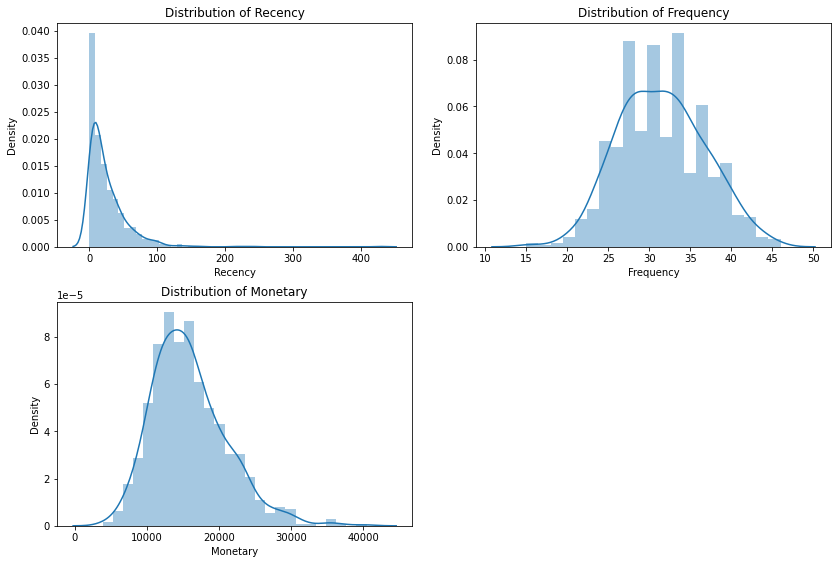

In [165]:
plt.figure(figsize=(12,8))
for index,i in enumerate(customers.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.distplot(customers[i])

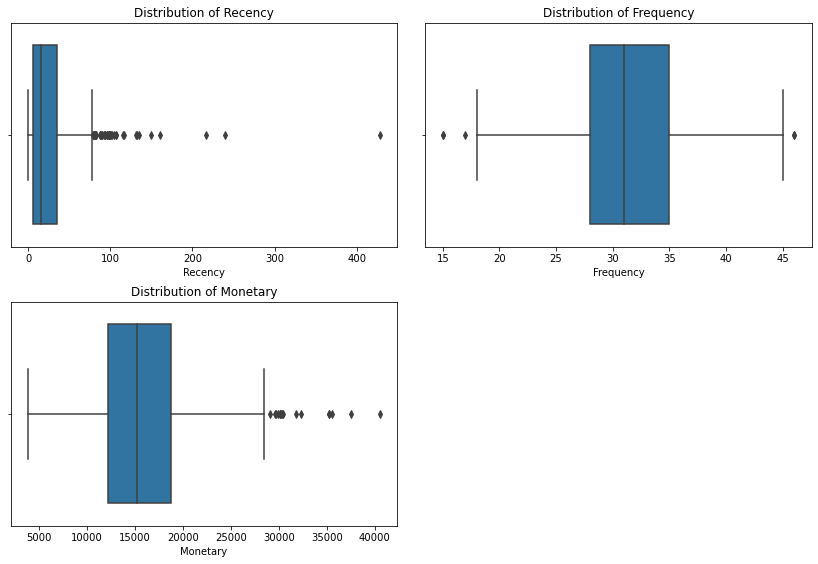

In [166]:
plt.figure(figsize=(12,8))
for index,i in enumerate(customers.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.boxplot(customers[i])

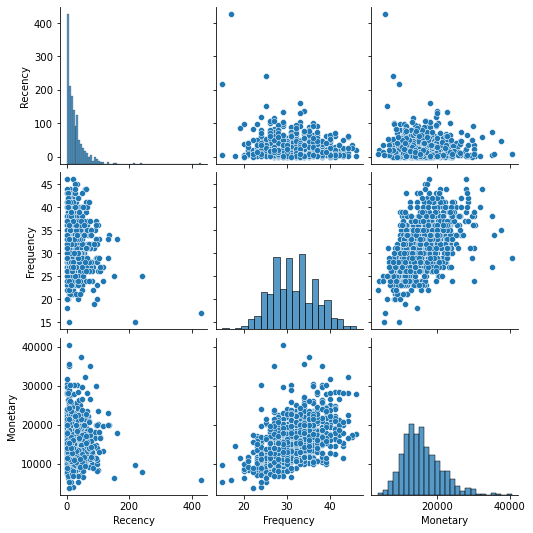

In [167]:
sns.pairplot(customers)

#### Observations - 

- On visualizing the recency, frequency and monetary variables, we observe a lot of highly positive / extreme outliers in the recency variables and some in the frequency variables.
- On visualizing the relationship between the 3 variables using pairplots, we can see that the outliers are resulting in a very wide spread distributions and patterns which could possily affect the quality of the potential clusters.
- Hence, we will first try remove the outliers

In [168]:
X = customers.copy()
X.head()

,Recency,Frequency,Monetary
CustomerName,,,
Rick Hansen,30,31,16352.9586
Jane Waco,12,38,30288.4503
Joseph Holt,11,44,20936.8844
Greg Maxwell,22,24,15356.4440
Thomas Boland,20,31,17423.9244


In [169]:
## Removing outliers using power transformer.

from sklearn.preprocessing import StandardScaler,PowerTransformer

PT = PowerTransformer().fit(X)
X = pd.DataFrame(PT.transform(X),columns=X.columns)
X.head()

,Recency,Frequency,Monetary
0,0.575826,-0.069956,0.210263
1,-0.218446,1.211251,2.271575
2,-0.286093,2.260824,1.000966
3,0.290218,-1.429158,0.016302
4,0.205904,-0.069956,0.408886


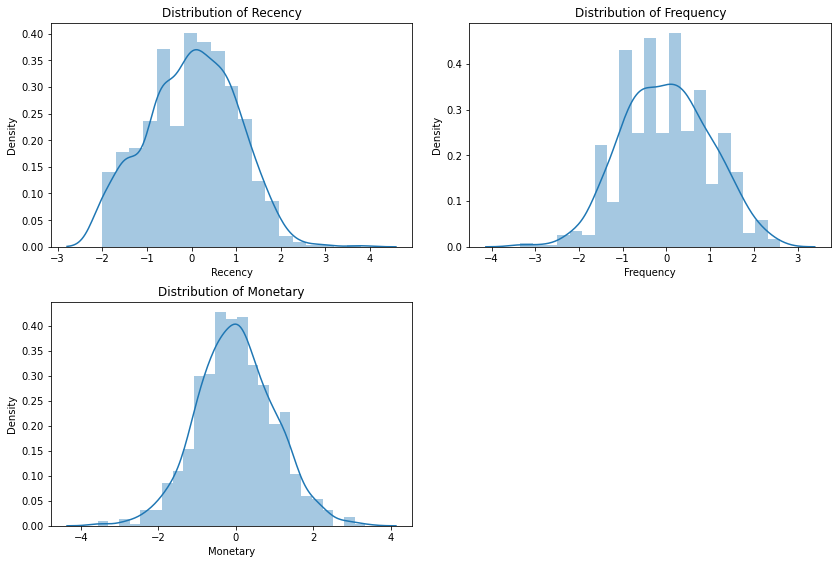

In [170]:
plt.figure(figsize=(12,8))
for index,i in enumerate(X.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.distplot(X[i])

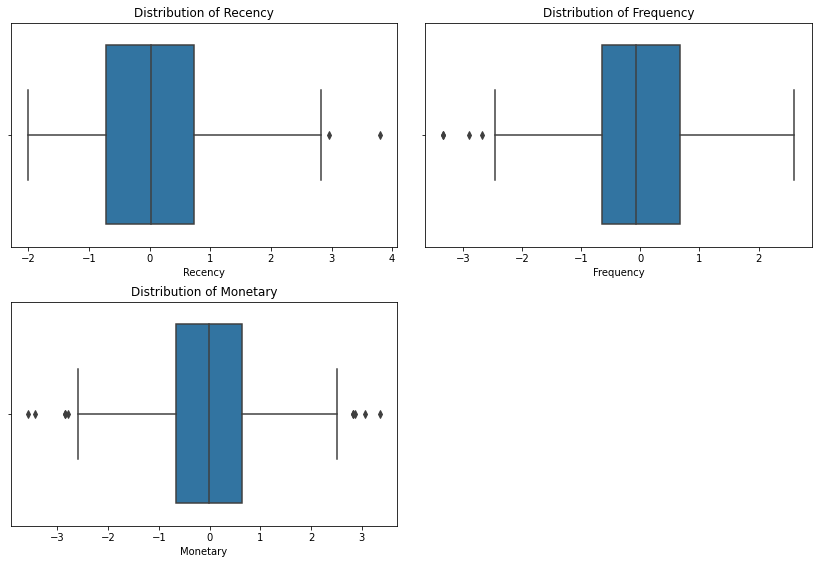

In [171]:
plt.figure(figsize=(12,8))
for index,i in enumerate(X.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.boxplot(X[i])

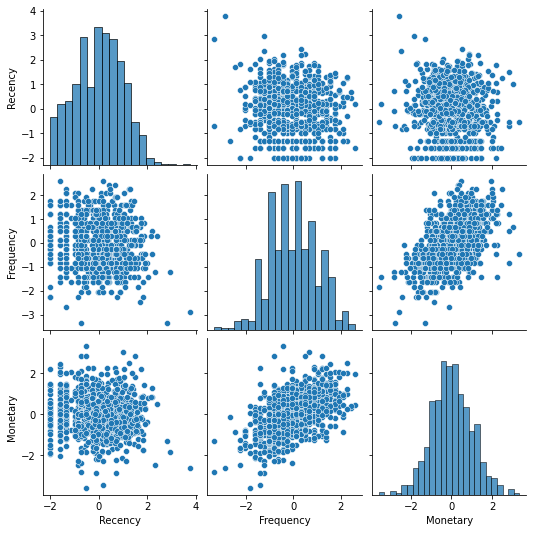

In [172]:
sns.pairplot(X)

In [173]:
SC = StandardScaler().fit(X)
X = pd.DataFrame(SC.transform(X),columns=X.columns)
X.head()

,Recency,Frequency,Monetary
0,0.575826,-0.069956,0.210263
1,-0.218446,1.211251,2.271575
2,-0.286093,2.260824,1.000966
3,0.290218,-1.429158,0.016302
4,0.205904,-0.069956,0.408886


## Creating Clusters

In [174]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

### Kmeans Clustering

In [175]:
Kmeans = KMeans(random_state=0).fit(X)
print("Inertia of Kmeans with default 8 clusters:",Kmeans.inertia_)

Inertia of Kmeans with default 8 clusters: 692.8896056927341


In [176]:
inertias = pd.DataFrame({"N_clusters":None,"Inertia":None},index=range(1))

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    inertias = inertias.append({"N_clusters":i,"Inertia":kmeans.inertia_},ignore_index=True)
    

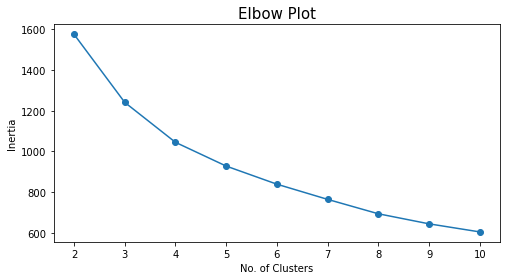

In [177]:
inertias.dropna(inplace=True)

plt.figure(figsize = (8,4))
plt.plot(inertias.N_clusters,inertias.Inertia,marker="o")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot",size=15)
plt.show()

In [178]:
inertias["Silhoutte_Score"] = None
scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    score = silhouette_score(X,kmeans.labels_)
    scores.append(score)
    
inertias["Silhoutte_Score"] = scores

In [179]:
inertias.sort_values("Silhoutte_Score",ascending=False)

,N_clusters,Inertia,Silhoutte_Score
1,2.0,1576.248499,0.299398
2,3.0,1241.117155,0.274963
3,4.0,1044.551292,0.252488
7,8.0,692.889606,0.240431
8,9.0,643.368392,0.240165
4,5.0,927.622884,0.238602
9,10.0,603.669447,0.237267
5,6.0,838.501214,0.234580
6,7.0,763.733439,0.232775


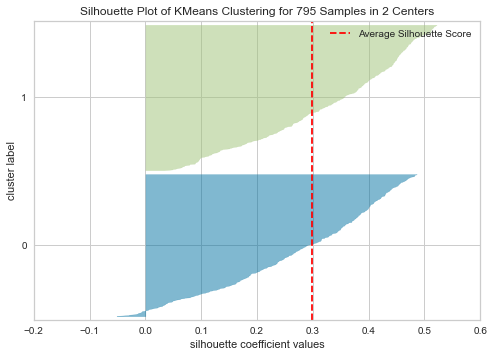

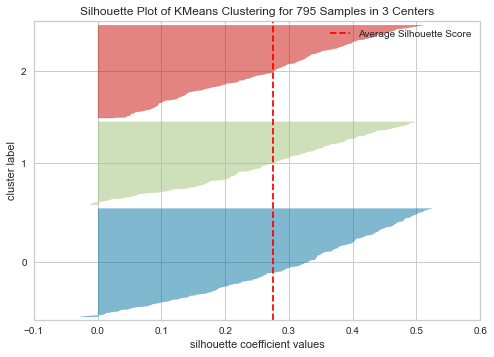

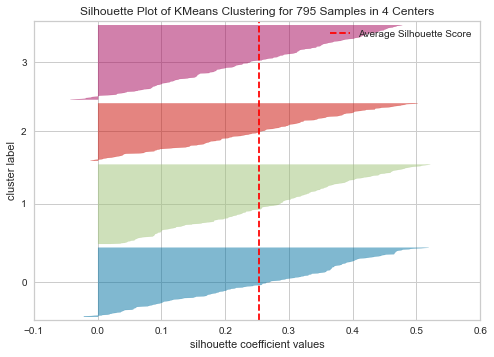

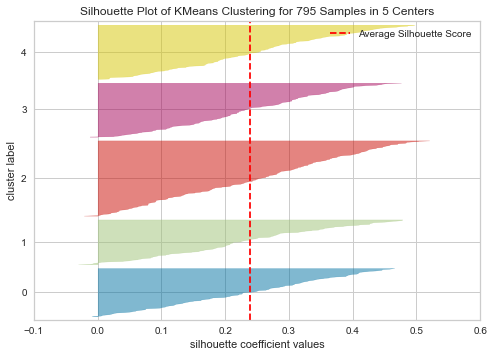

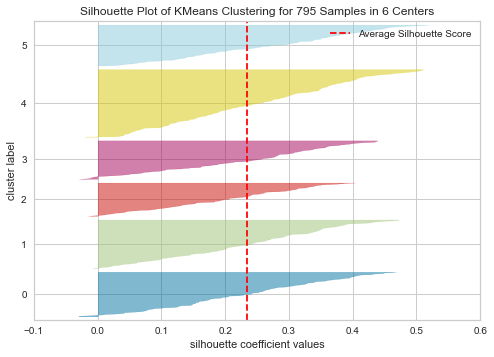

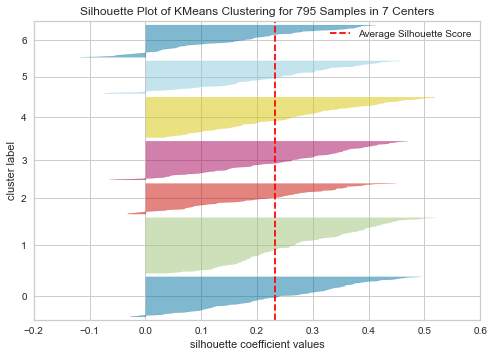

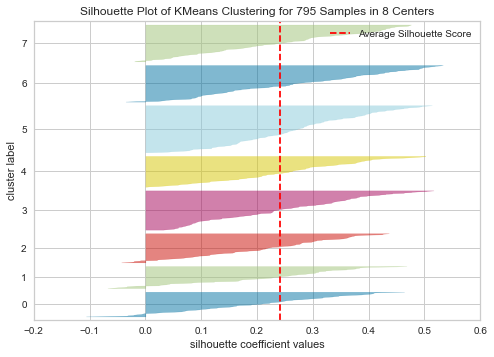

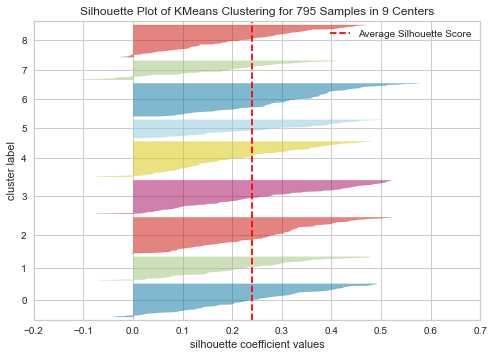

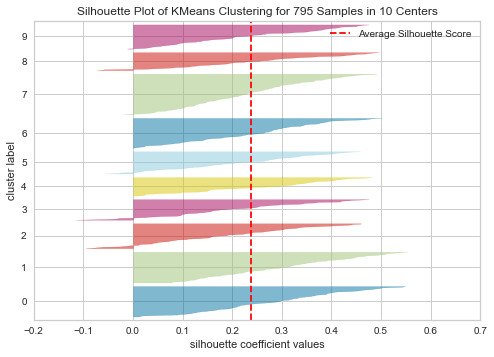

In [180]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

### Agglomerative Clustering
  

In [181]:
Agg = AgglomerativeClustering().fit(X)
score = silhouette_score(X,Agg.labels_)
print("Silhoutte score for Agglomerative clustering with default cluster i.e 2:",score)

Silhoutte score for Agglomerative clustering with default cluster i.e 2: 0.24974492183976937


In [182]:
agg_scores = pd.DataFrame({"N_clusters":None,"Silhoutte":None},index=range(1))

for i in range(2,11):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    score = silhouette_score(X,agg.labels_)
    agg_scores = agg_scores.append({"N_clusters":i,"Silhoutte":score},ignore_index=True)
    

In [183]:
agg_scores.dropna(inplace=True)
agg_scores

,N_clusters,Silhoutte
1,2.0,0.249745
2,3.0,0.222302
3,4.0,0.192682
4,5.0,0.179010
5,6.0,0.173027
6,7.0,0.169626
7,8.0,0.184824
8,9.0,0.180763
9,10.0,0.190068


In [184]:
for met in ["single","average","ward","complete"]:
    for dist in ["euclidean","minkowski"]:
        if met != "ward":
            distance = linkage(X,method=met,metric=dist)
            cop = cophenet(distance,pdist(X,metric=dist))
            print(f"Cophenet coefficient for {met}-{dist}:",cop[0])
        else:
            distance = linkage(X,method=met,metric="euclidean")
            cop = cophenet(distance,pdist(X,metric="euclidean"))
            print(f"Cophenet coefficient for {met}-euclidean:",cop[0])

Cophenet coefficient for single-euclidean: 0.5533563950837399
Cophenet coefficient for single-minkowski: 0.5533563950837399
Cophenet coefficient for average-euclidean: 0.6226309088250694
Cophenet coefficient for average-minkowski: 0.6226309088250694
Cophenet coefficient for ward-euclidean: 0.4470678525068632
Cophenet coefficient for ward-euclidean: 0.4470678525068632
Cophenet coefficient for complete-euclidean: 0.5047604331649151
Cophenet coefficient for complete-minkowski: 0.5047604331649151


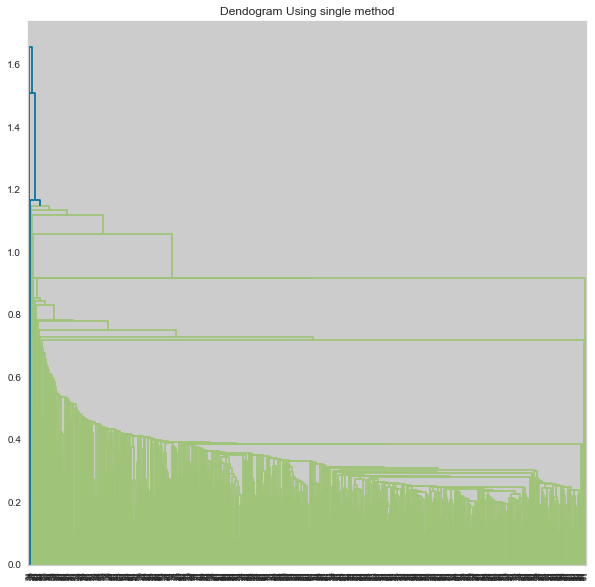

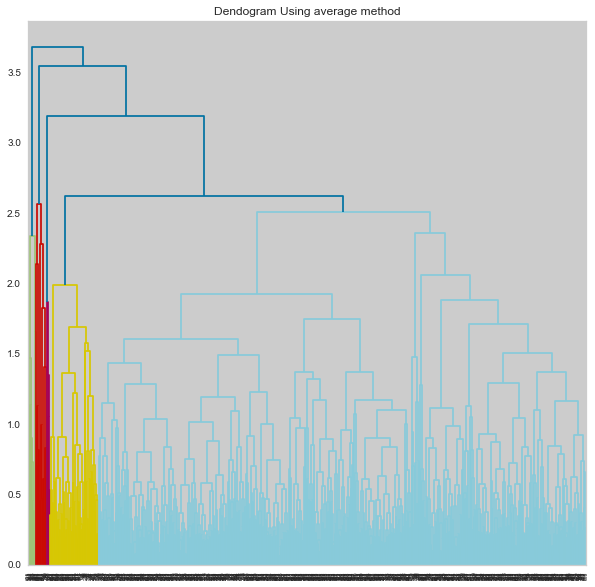

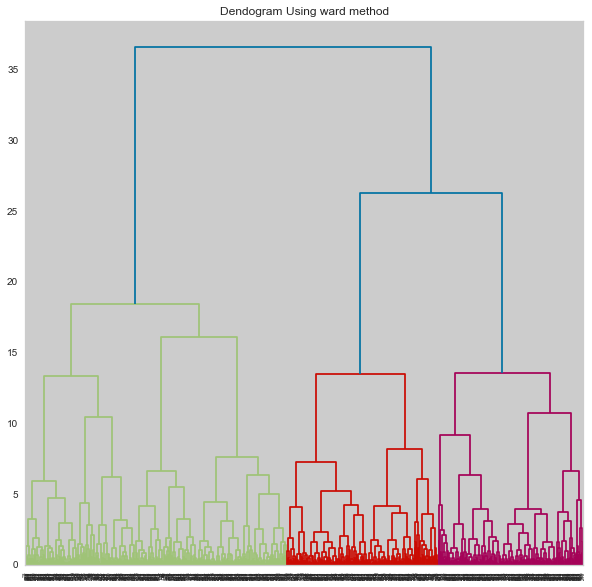

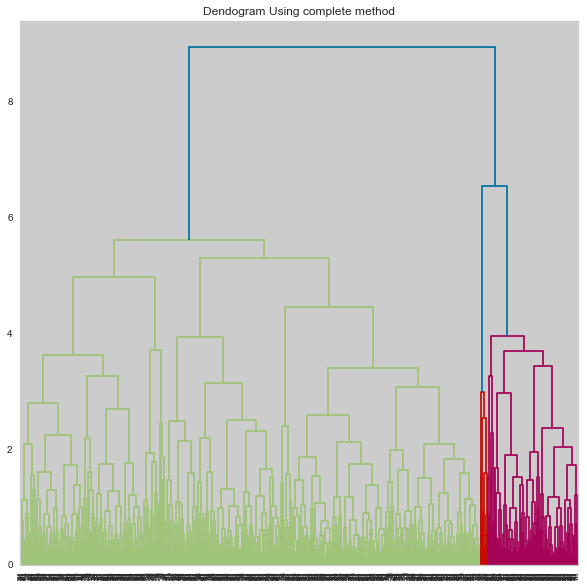

In [185]:
for metric in ["single","average","ward","complete"]:
    distance = linkage(X,method=metric)
    plt.figure(figsize=(10,10))
    dendrogram(distance)
    plt.title(f"Dendogram Using {metric} method")

In [186]:
for met in ["single","average","ward","complete"]:
    for i in [2,3]:
        agg = AgglomerativeClustering(n_clusters=i,linkage=met).fit(X)
        score = silhouette_score(X,agg.labels_)
        print(f"silhoutte coefficient with {i} cluster for {met} using euclidean distance:",score)

silhoutte coefficient with 2 cluster for single using euclidean distance: 0.5810175234500853
silhoutte coefficient with 3 cluster for single using euclidean distance: 0.5054429558018692
silhoutte coefficient with 2 cluster for average using euclidean distance: 0.36058496993960704
silhoutte coefficient with 3 cluster for average using euclidean distance: 0.2946674623656874
silhoutte coefficient with 2 cluster for ward using euclidean distance: 0.24974492183976937
silhoutte coefficient with 3 cluster for ward using euclidean distance: 0.2223018050223556
silhoutte coefficient with 2 cluster for complete using euclidean distance: 0.25881170946305215
silhoutte coefficient with 3 cluster for complete using euclidean distance: 0.2255962094099125


#### Observations
- On using Kmeans clusterings, we observed that when n cluster = 2, we get the highest silhouette score i.e 0.30.
- On using Agglomerative clustering, we observed that when n cluster = 2, we get the highest silhouette score i.e 0.25 when using ward method of distance calculation.
- We did get better scores in agglomerative using single and average method of distance calculation. However, the clusters were not clearly distinguishable since very few customers were put into 1 cluster.
- Also, on using the ward method for calculating dendogramic distances, we observed a good differentiation between data points when n-clusters = 2.

**Hence, we choose n-clusters = 2** 

### Visualizing the new clusters

In [187]:
kmeans = KMeans(n_clusters=2).fit(X)
agg = AgglomerativeClustering(n_clusters=2,linkage="ward").fit(X)
customers["Kmeans_Cluster"] = kmeans.labels_
customers["Agg_Cluster"] = kmeans.labels_


In [188]:
customers["Kmeans_Cluster"] = customers.Kmeans_Cluster.apply(lambda x:f"Cluster {x}")
customers["Agg_Cluster"] = customers.Agg_Cluster.apply(lambda x:f"Cluster {x}")

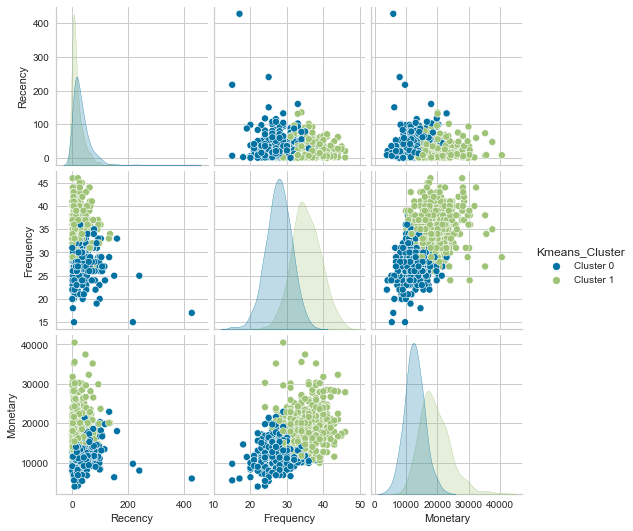

In [189]:
sns.pairplot(customers,hue="Kmeans_Cluster")

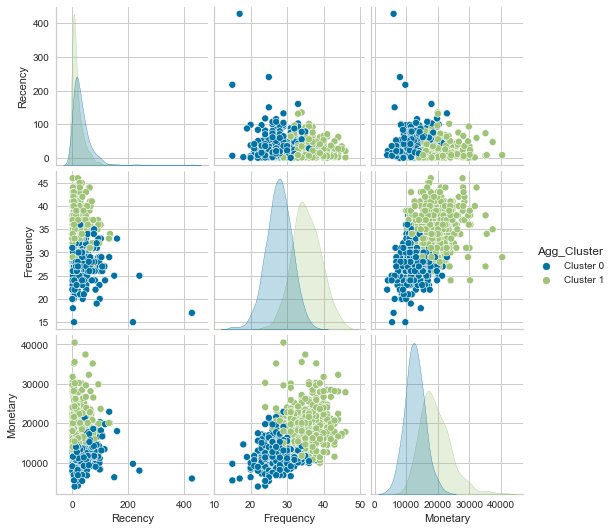

In [190]:
sns.pairplot(customers,hue="Agg_Cluster")
plt.show()

In [191]:
customers.drop("Agg_Cluster",axis=1,inplace=True)

In [192]:
customers

,Recency,Frequency,Monetary,Kmeans_Cluster
CustomerName,,,,
Rick Hansen,30,31,16352.95860,Cluster 0
Jane Waco,12,38,30288.45030,Cluster 1
Joseph Holt,11,44,20936.88440,Cluster 1
Greg Maxwell,22,24,15356.44400,Cluster 0
Thomas Boland,20,31,17423.92440,Cluster 1
...,...,...,...,...
Carl Jackson,13,27,13970.26496,Cluster 0
Lela Donovan,21,37,16184.63858,Cluster 1
Thais Sissman,20,27,6785.88940,Cluster 0


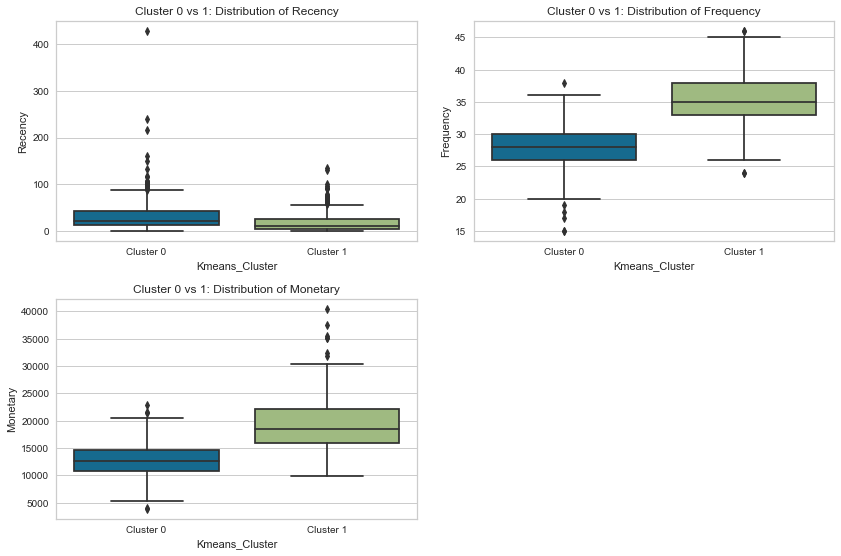

In [193]:
plt.figure(figsize=(12,8))
for index,i in enumerate(customers.columns[:-1]):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Cluster 0 vs 1: Distribution of {i}")
    sns.boxplot(y=customers[i],x=customers.Kmeans_Cluster)

In [194]:
customers[customers.Kmeans_Cluster=="Cluster 0"].describe()

,Recency,Frequency,Monetary
count,402.000000,402.000000,402.000000
mean,32.542289,27.723881,12670.693383
std,36.002902,3.514966,3129.962936
min,0.000000,15.000000,3892.227000
25%,12.000000,26.000000,10710.007940
50%,22.500000,28.000000,12573.751940
75%,42.000000,30.000000,14706.783055
max,428.000000,38.000000,22902.741560


In [195]:
customers[customers.Kmeans_Cluster=="Cluster 1"].describe()

,Recency,Frequency,Monetary
count,393.000000,393.000000,393.000000
mean,18.183206,35.343511,19208.354122
std,21.399195,3.932020,4825.717176
min,0.000000,24.000000,9923.761600
25%,4.000000,33.000000,15939.612020
50%,10.000000,35.000000,18519.159640
75%,25.000000,38.000000,22127.775000
max,135.000000,46.000000,40488.070800


#### Observations - 

- On visualizing the kmeans and agglomerative clusters formed seperately and comparing, we see no difference in patterns.
- Hence, we can use either of the two.
- Also, on comparing the RFM features for the 2 different clusters, we find many differences.
- Based on medians, the recency value for customers in cluster 0 is 22.5 whereas in cluster 1 its 10.
- Based on medians, the frequency value for customers in cluster 0 is 28 whereas in cluster 1 its 35.
- Based on medians, the monetary value for customers in cluster 0 is around 12500 whereas in cluster 1 its around 22000.

**These observations show that the differences observed by the means of the clusters are good enough to differentiate the customers into 2 groups.**

In [196]:
customers.reset_index(inplace=True)

In [197]:
customer_cluster = customers[["CustomerName","Kmeans_Cluster"]]

In [199]:
data = data.merge(customer_cluster,left_on="CustomerName",right_on="CustomerName")

In [200]:
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,ProductID,Category,SubCategory,...,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay,Region,Country,Kmeans_Cluster
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,TEC-AC-10003033,Technology,Accessories,...,7,0.0,762.1845,933.57,Critical,0,Weekday Order,North America,United States,Cluster 0
1,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,FUR-TA-10002903,Furniture,Tables,...,7,0.4,-290.8752,348.18,Critical,0,Weekday Order,North America,United States,Cluster 0
2,CA-2014-121538,2014-11-29,2014-02-12,First Class,RH-19495,Rick Hansen,Consumer,OFF-PA-10004071,Office Supplies,Paper,...,2,0.2,31.0688,11.36,High,-290,Weekend Order,North America,United States,Cluster 0
3,CA-2011-110639,2011-08-23,2011-08-23,Same Day,RH-19495,Rick Hansen,Consumer,OFF-PA-10004530,Office Supplies,Paper,...,4,0.0,22.5008,7.52,High,0,Weekday Order,North America,United States,Cluster 0
4,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,OFF-PA-10004621,Office Supplies,Paper,...,3,0.0,9.3312,7.24,Critical,0,Weekday Order,North America,United States,Cluster 0


## Exporting File to Sales Table in MySQL

In [201]:
from sqlalchemy import create_engine

In [202]:
my_conn = create_engine("mysql+mysqldb://root:06MYSQLkey@#@localhost/python")

In [203]:
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,ProductID,Category,SubCategory,...,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay,Region,Country,Kmeans_Cluster
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,TEC-AC-10003033,Technology,Accessories,...,7,0.0,762.1845,933.57,Critical,0,Weekday Order,North America,United States,Cluster 0
1,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,FUR-TA-10002903,Furniture,Tables,...,7,0.4,-290.8752,348.18,Critical,0,Weekday Order,North America,United States,Cluster 0
2,CA-2014-121538,2014-11-29,2014-02-12,First Class,RH-19495,Rick Hansen,Consumer,OFF-PA-10004071,Office Supplies,Paper,...,2,0.2,31.0688,11.36,High,-290,Weekend Order,North America,United States,Cluster 0
3,CA-2011-110639,2011-08-23,2011-08-23,Same Day,RH-19495,Rick Hansen,Consumer,OFF-PA-10004530,Office Supplies,Paper,...,4,0.0,22.5008,7.52,High,0,Weekday Order,North America,United States,Cluster 0
4,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,OFF-PA-10004621,Office Supplies,Paper,...,3,0.0,9.3312,7.24,Critical,0,Weekday Order,North America,United States,Cluster 0


In [204]:
data.columns

Index(['OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'ProductID', 'Category', 'SubCategory',
       'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit',
       'ShippingCost', 'OrderPriority', 'DaysTillShipment', 'OrderDay',
       'Region', 'Country', 'Kmeans_Cluster'],
      dtype='object')

In [205]:
data.to_sql(con=my_conn,name="sales",if_exists="replace",index=False)